# Handling imbalance dataset using SMOTE (Synthetic Minority Oversampling Technique)

#### Importing make_classification to create dataset for the example 

In [1]:
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=42)

In [3]:
X

array([[ 1.0735459 , -1.10133925],
       [ 0.75594526, -1.1723519 ],
       [ 1.35447877, -0.94852841],
       ...,
       [-2.15090138, -2.98937226],
       [ 2.45164689, -0.1566294 ],
       [ 3.64147835,  0.75692519]], shape=(1000, 2))

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#### importing pandas to create dataframe and to do some tabular tasks

In [5]:
import pandas as pd

In [6]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
df_main=pd.concat([df1,df2],axis=1)

In [7]:
df_main

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
995,1.713939,0.451639,1
996,1.509473,-0.794996,0
997,-2.150901,-2.989372,0
998,2.451647,-0.156629,0


#### Understanding the data

In [8]:
df_main.shape

(1000, 3)

In [9]:
df_main['f1'].shape

(1000,)

In [10]:
df_main['f2'].shape

(1000,)

In [11]:
df_main['target'].value_counts()

target
0    896
1    104
Name: count, dtype: int64

#### Using matplotlib for visualization 

In [12]:
import matplotlib.pyplot as plt

#### Visualization of class distribution before applying the SMOTE technique

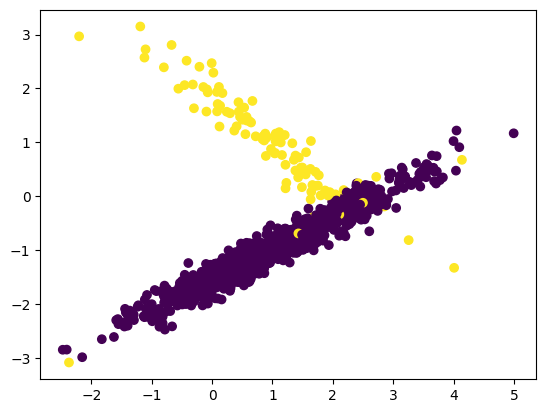

In [13]:
plt.scatter(df_main['f1'],df_main['f2'],c=df_main['target'])

#### Importing the imblearn library and utilizing the imblearn.over_sampling module to access the SMOTE class for handling imbalanced datasets.

In [14]:
from imblearn.over_sampling import SMOTE

##### Initialization 

In [15]:
sm=SMOTE()

In [16]:
X,y=sm.fit_resample(df_main[['f1','f2']],df_main[['target']])

##### The fit_resample() method is part of the data preprocessing pipeline. It is used to balance the dataset by generating synthetic samples (in this case, using SMOTE), ensuring that both the majority and minority classes are equally represented.

In [17]:
df1_oversample=pd.DataFrame(X,columns=['f1','f2'])
df2_oversample=pd.DataFrame(y,columns=['target'])
df_main_oversampled=pd.concat([df1_oversample,df2_oversample],axis=1)

#### Creating new dataframe after handling imbalance data

In [18]:
df_main_oversampled

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
1787,1.378459,-0.714052,1
1788,2.646652,0.243829,1
1789,0.014474,1.573664,1
1790,1.702628,0.277211,1


#### Visualization of class distribution after applying the SMOTE technique

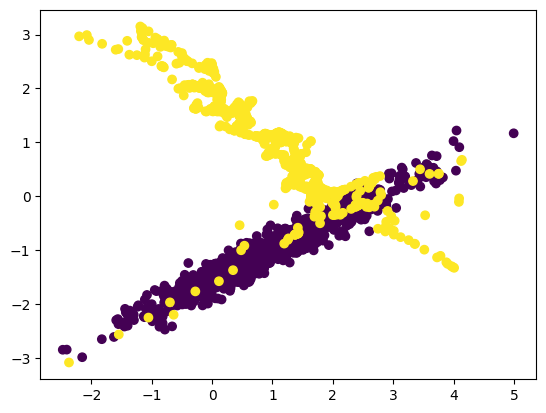

In [19]:
plt.scatter(df_main_oversampled['f1'],df_main_oversampled['f2'],c=df_main_oversampled['target'])

#   <h1 style="text-align: center;">Before Vs After</h1>

### Before

In [20]:
print(df_main.shape)
print(df_main['f1'].shape)
print(df_main['f2'].shape)
print(df_main['target'].value_counts())

(1000, 3)
(1000,)
(1000,)
target
0    896
1    104
Name: count, dtype: int64


### After

In [21]:
print(df_main_oversampled.shape)
print(df_main_oversampled['f1'].shape)
print(df_main_oversampled['f2'].shape)
print(df_main_oversampled['target'].value_counts())

(1792, 3)
(1792,)
(1792,)
target
0    896
1    896
Name: count, dtype: int64


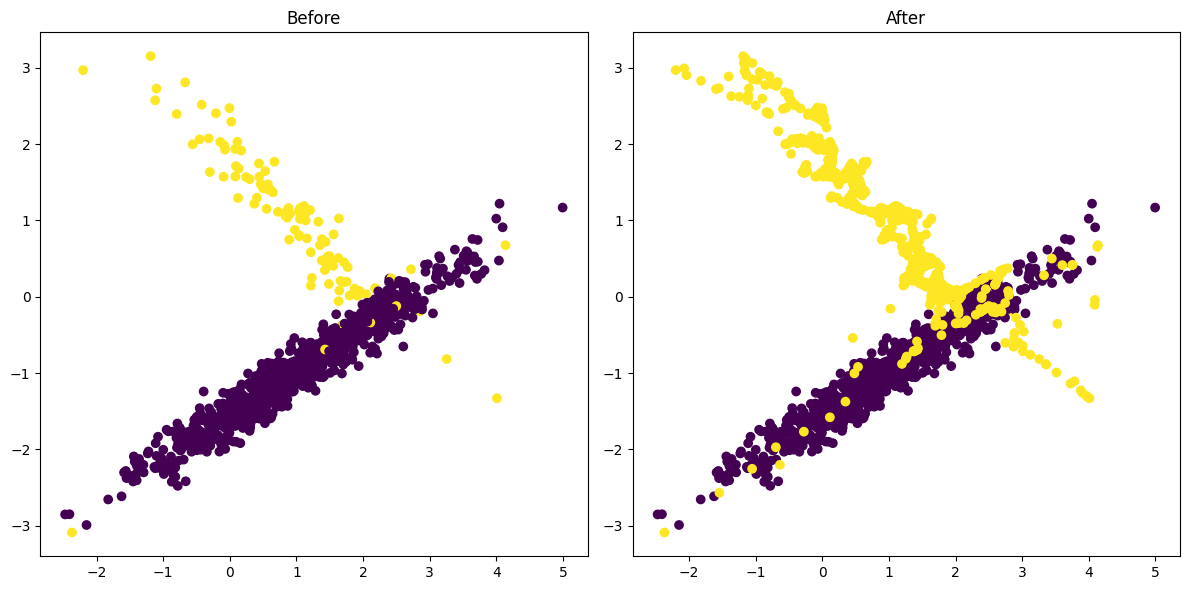

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.scatter(df_main['f1'],df_main['f2'],c=df_main['target'])
plt.title("Before")

plt.subplot(1,2,2)
plt.scatter(df_main_oversampled['f1'],df_main_oversampled['f2'],c=df_main_oversampled['target'])
plt.title("After")

plt.tight_layout()
plt.show()

In the above diagram, the left plot illustrates the class imbalance in the dataset before applying any oversampling technique. As observed, the yellow points represent the minority class, while the purple points represent the majority class. This imbalance can negatively impact the performance of machine learning models by biasing predictions toward the majority class.

To address this, we applied SMOTE (Synthetic Minority Oversampling Technique), which generates synthetic samples for the minority class to balance the dataset. The right plot demonstrates the result after applying SMOTE, where both the minority and majority classes have an equal number of samples, ensuring a more balanced class distribution.

In [5]:
# The End